### Azure Face Service - Face APIs - Find Similar and Face Verify

#### Imports

In [1]:
import asyncio
import io
import glob
import os
import sys
import time
import uuid
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw


from azure.cognitiveservices.vision.face import FaceClient
from msrest.authentication import CognitiveServicesCredentials
from azure.cognitiveservices.vision.face.models import TrainingStatusType, Person


import matplotlib.pyplot as plt

#### Utilitiy Functions

In [2]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(10,5))
    plt.imshow(img)
    plt.show()
    
def show_image_object_in_cell(image_object):
    plt.figure(figsize=(10,5))
    plt.imshow(image_object)
    plt.show()
    
# TAKEN FROM THE Azure SDK Sample
# Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary.face_rectangle
    left = rect.left
    top = rect.top
    right = left + rect.width
    bottom = top + rect.height
    
    return ((left, top), (right, bottom))

def drawFaceRectangles(source_file, detected_face_object) :
    # Download the image from the url
    response = requests.get(source_file)
    img = Image.open(BytesIO(response.content))
    # Draw a red box around every detected faces
    draw = ImageDraw.Draw(img)
    for face in detected_face_object:
        draw.rectangle(getRectangle(face), outline='red', width = 10)
    return img

#### Accessing Specific Azure Resources

In [3]:
KEY = "fa5c8feba2b041faabda650a718d81c3"
ENDPOINT = "https://secondfaceservice.cognitiveservices.azure.com/"

# Create an authenticated FaceClient.
face_client = FaceClient(ENDPOINT, CognitiveServicesCredentials(KEY))

In [4]:
image_01 = "https://media1.popsugar-assets.com/files/thumbor/E7biN5cuZeBgfE5YDmjqAXZnVCw/478x214:2903x2639/fit-in/500x500/filters:format_auto-!!-:strip_icc-!!-/2020/03/03/016/n/1922398/c0ddb5d95e5ee717f25337.09973126_/i/Mark-Ruffalo.jpg"
image_02 = "https://media1.popsugar-assets.com/files/thumbor/60VRbpaf-sywsB92rqXghcPKpFc/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2021/03/01/721/n/44498184/aa1f195d603d13cbcf7b68.32069605_/i/mark-ruffalo-kids.jpg"

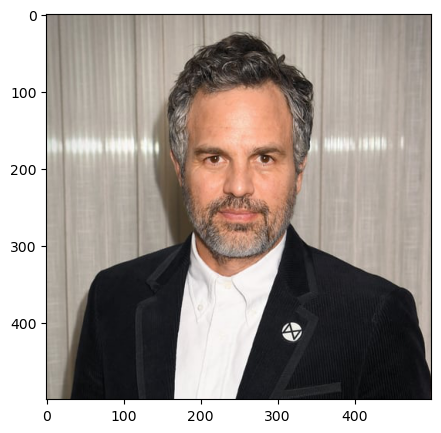

In [5]:
show_image_in_cell(image_01)

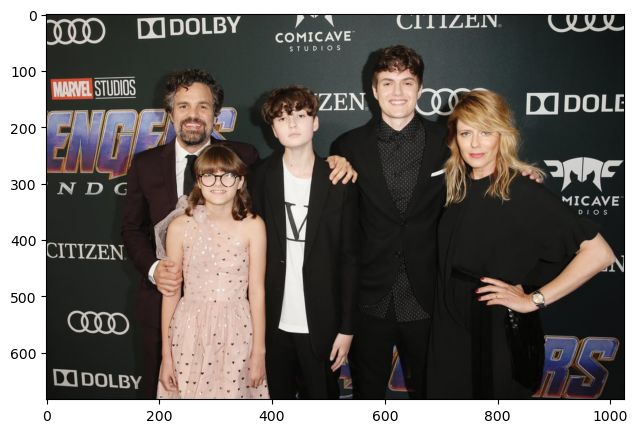

In [6]:
show_image_in_cell(image_02)

#### Using Face - Detect API to Extract Face Attributes
- Detect Face from an image
- To add a few more face attributes in the `return_face_attributes` section. You can find valid attributes in this Azure [`detect_with_url` documentation](https://docs.microsoft.com/en-us/rest/api/faceapi/face/detect-with-url#faceattributes).

In [7]:
# Detect Face from an image
def detect_face_with_attributes_02_from_any_url(selected_image_url):
    detected_faces = face_client.face.detect_with_url(url=selected_image_url,
                                                      return_face_attributes=[
        # Todo: add more face attributes
                'headPose',
                'accessories',
                'blur',
                'exposure',
                'glasses',
                'noise',
                'occlusion'
                ])
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(selected_image_url))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

#### Detect Face In the First Image

In [8]:
detected_faces_01_object = detect_face_with_attributes_02_from_any_url(image_01)

Total face(s) detected  from 1


In [9]:
for face in detected_faces_01_object: 
    print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': 0.8, 'yaw': 2.0, 'pitch': -6.5}


In [10]:
detected_faces_02_object = detect_face_with_attributes_02_from_any_url(image_02)

Total face(s) detected  from 4


In [11]:
for face in detected_faces_02_object: 
        print (face.face_attributes.head_pose)

{'additional_properties': {}, 'roll': -2.5, 'yaw': -8.5, 'pitch': -5.8}
{'additional_properties': {}, 'roll': 1.1, 'yaw': 2.7, 'pitch': 6.0}
{'additional_properties': {}, 'roll': -1.2, 'yaw': 0.4, 'pitch': 2.2}
{'additional_properties': {}, 'roll': -6.9, 'yaw': -5.0, 'pitch': 1.9}


#### Extracting More Face Attributes From the Face Detect API Result

In [12]:
# Todo: change the attributes based on your settings
for face in detected_faces_01_object: 
    print (face.face_attributes.accessories)
    print (face.face_attributes.blur)
    print (face.face_attributes.exposure)
    print (face.face_attributes.glasses)
    print (face.face_attributes.noise)
    print (face.face_attributes.occlusion)

[]
{'additional_properties': {}, 'blur_level': <BlurLevel.low: 'Low'>, 'value': 0.0}
{'additional_properties': {}, 'exposure_level': <ExposureLevel.good_exposure: 'GoodExposure'>, 'value': 0.65}
GlassesType.no_glasses
{'additional_properties': {}, 'noise_level': <NoiseLevel.medium: 'Medium'>, 'value': 0.45}
{'additional_properties': {}, 'forehead_occluded': False, 'eye_occluded': False, 'mouth_occluded': False}


In [13]:
# Extracting Hair color attributes from the Face Detect API result
"""for face in detected_faces_01_object: 
    for each_hair_color in face.face_attributes.hair.hair_color:
        print (each_hair_color)"""
for face in detected_faces_02_object: 
    print (face.face_attributes.accessories)
    print (face.face_attributes.blur)
    print (face.face_attributes.exposure)
    print (face.face_attributes.glasses)
    print (face.face_attributes.noise)
    print (face.face_attributes.occlusion)

[]
{'additional_properties': {}, 'blur_level': <BlurLevel.low: 'Low'>, 'value': 0.21}
{'additional_properties': {}, 'exposure_level': <ExposureLevel.good_exposure: 'GoodExposure'>, 'value': 0.66}
GlassesType.no_glasses
{'additional_properties': {}, 'noise_level': <NoiseLevel.low: 'Low'>, 'value': 0.26}
{'additional_properties': {}, 'forehead_occluded': False, 'eye_occluded': False, 'mouth_occluded': False}
[]
{'additional_properties': {}, 'blur_level': <BlurLevel.low: 'Low'>, 'value': 0.14}
{'additional_properties': {}, 'exposure_level': <ExposureLevel.good_exposure: 'GoodExposure'>, 'value': 0.66}
GlassesType.no_glasses
{'additional_properties': {}, 'noise_level': <NoiseLevel.high: 'High'>, 'value': 1.0}
{'additional_properties': {}, 'forehead_occluded': False, 'eye_occluded': False, 'mouth_occluded': False}
[]
{'additional_properties': {}, 'blur_level': <BlurLevel.medium: 'Medium'>, 'value': 0.38}
{'additional_properties': {}, 'exposure_level': <ExposureLevel.good_exposure: 'GoodExpo

#### Using Find Similar API

In [14]:
# Todo: add the image urls
face_image = "https://media1.popsugar-assets.com/files/thumbor/E7biN5cuZeBgfE5YDmjqAXZnVCw/478x214:2903x2639/fit-in/500x500/filters:format_auto-!!-:strip_icc-!!-/2020/03/03/016/n/1922398/c0ddb5d95e5ee717f25337.09973126_/i/Mark-Ruffalo.jpg"
group_image = "https://media1.popsugar-assets.com/files/thumbor/60VRbpaf-sywsB92rqXghcPKpFc/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2021/03/01/721/n/44498184/aa1f195d603d13cbcf7b68.32069605_/i/mark-ruffalo-kids.jpg"

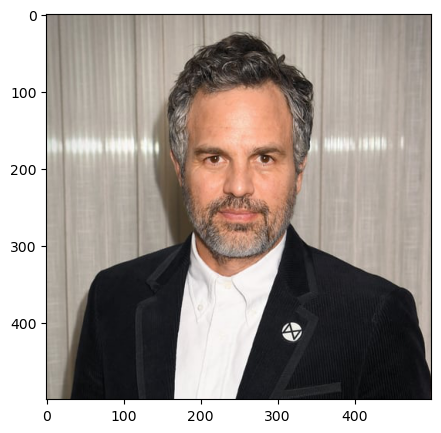

In [15]:
show_image_in_cell(face_image)

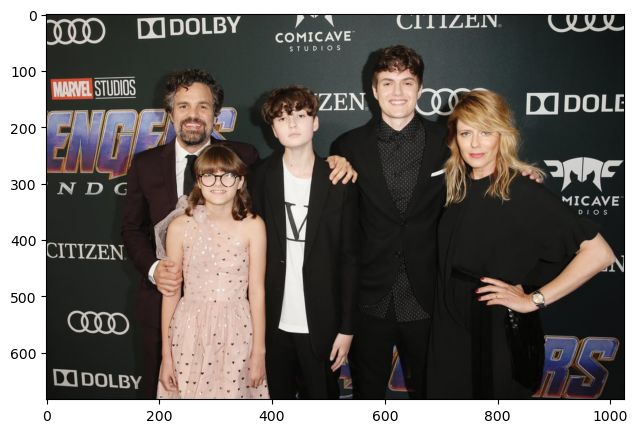

In [16]:
show_image_in_cell(group_image)

#### Detect Face From an Image

In [17]:
# Detect Face from an image
def detect_face_from_any_url(selected_image):
    # Todo: set the face_client.face.detect_with_url object. Make sure to use the 'detection_03' model
    detected_faces = face_client.face.detect_with_url(url=selected_image, detection_model="detection_03")
    if not detected_faces:
        raise Exception('No face detected from image {}'.format(single_image_name))        
    print('Total face(s) detected  from {}'.format(str(len(detected_faces))))
    return detected_faces

In [18]:
# Define a function to output detected faces
def list_all_faces_from_detected_face_object(detected_faces_object):
    print('We found total {} face(s) in selected face detected object.'.format(str(len(detected_faces_object))))
    for face in detected_faces_object: 
        print (face.face_id)

In [19]:
# Todo: detect and list detected faces in the first image
source_faces_object = detect_face_from_any_url(face_image)
list_all_faces_from_detected_face_object(source_faces_object)

Total face(s) detected  from 1
We found total 1 face(s) in selected face detected object.
b9a71c71-d9ec-4241-b263-e3a24dc4720f


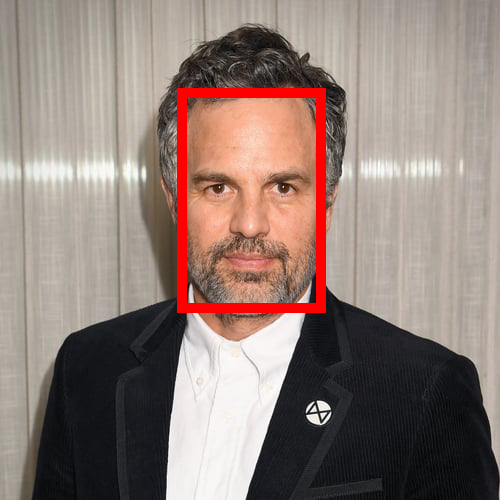

In [20]:
# Draw boxes around the detected faces in the image
drawFaceRectangles(face_image, source_faces_object)

In [21]:
# Todo: detect and list detected faces in the second image
group_faces_object = detect_face_from_any_url(group_image)
list_all_faces_from_detected_face_object(group_faces_object)

Total face(s) detected  from 5
We found total 5 face(s) in selected face detected object.
a0095a2f-accd-46d0-a967-1ac3facab40b
b86d3d6e-5f9a-4fcf-9033-45315c4a9c44
7a63a541-5ce8-4753-9172-1544384c2529
b297aca5-710a-48bc-9031-fb584e34111b
820a41c5-a842-4100-9330-87ba8d49ee54


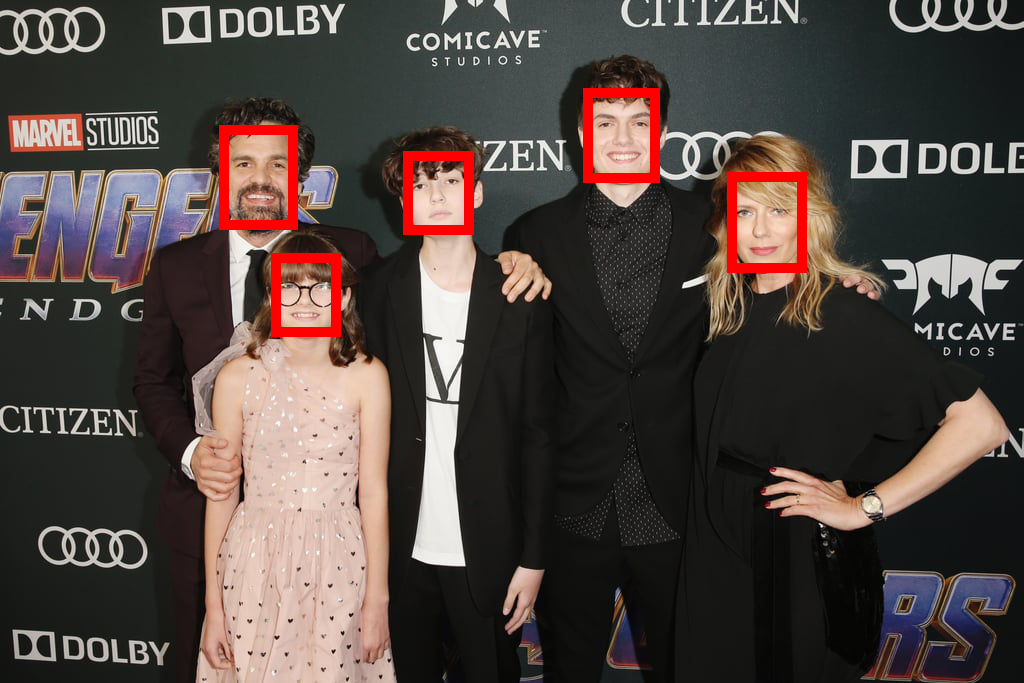

In [22]:
# Draw boxes around the detected faces in the image
drawFaceRectangles(group_image, group_faces_object)

#### Set FACE ID

In [23]:
# Source FACE ID
for face in source_faces_object:
    source_image_face_id = face.face_id
print(source_image_face_id)

b9a71c71-d9ec-4241-b263-e3a24dc4720f


In [24]:
# Group FACE ID
group_image_face_IDs_list = list(map(lambda x: x.face_id, group_faces_object))
print('All faces in the group list {}'.format(str(len(group_image_face_IDs_list))))

All faces in the group list 5


#### Find Similar

In [25]:
# Todo: set the face_client.face.find_similar object
similar_faces = face_client.face.find_similar(face_id=source_image_face_id, face_ids=group_image_face_IDs_list)
for similar_face in similar_faces:
    print(similar_face.face_id)

a0095a2f-accd-46d0-a967-1ac3facab40b


In [26]:
# Define a function to get get similar face object
def get_similar_face_object(similar_faces, group_faces_object):
    for face in similar_faces:
        first_image_face_ID = face.face_id
        face_info = next(x for x in group_faces_object if x.face_id == first_image_face_ID)
        if face_info:
            return face_info
        return None

In [27]:
# Todo: call the function to get get similar face object
similar_face_info = get_similar_face_object(similar_faces, group_faces_object)

In [28]:
first_image_face_ID = similar_face_info.face_id

#### Show Similar Face

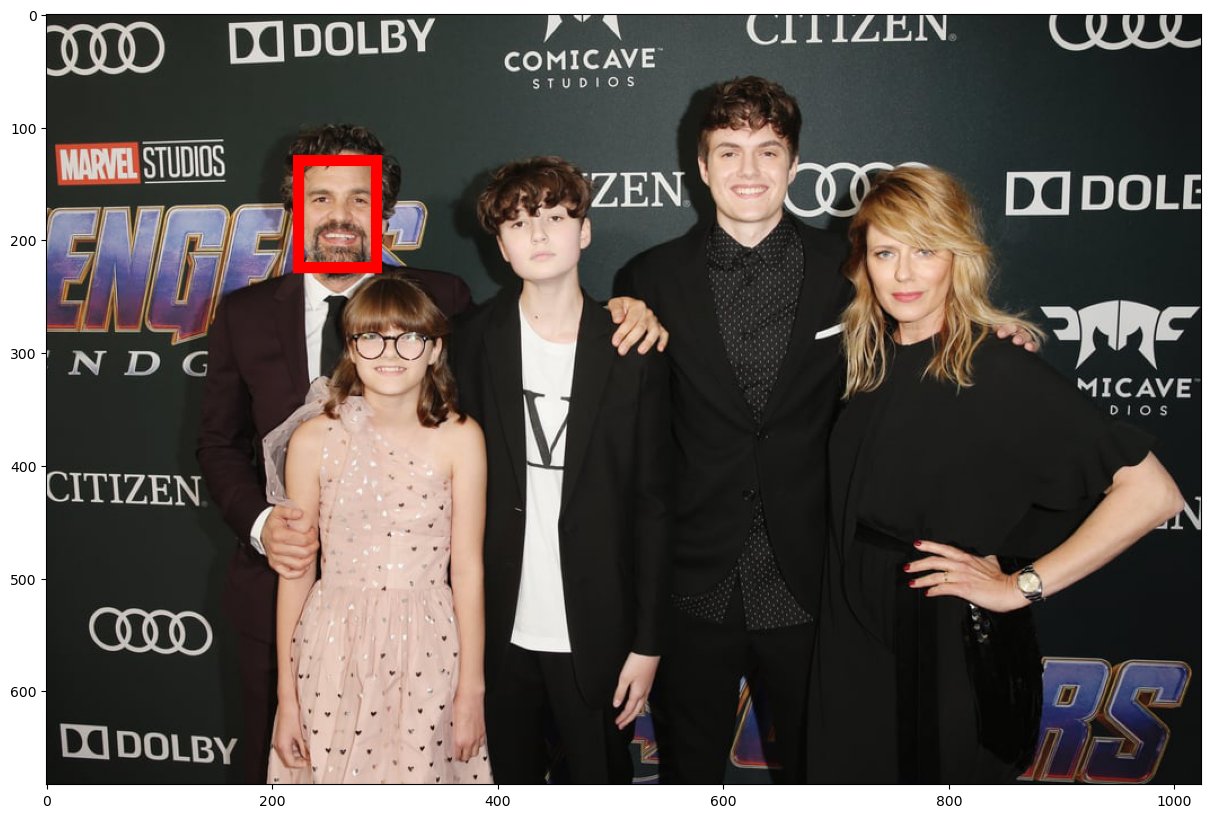

In [29]:
response = requests.get(group_image)
img = Image.open(BytesIO(response.content))
# Draw a red box around every detected faces
draw = ImageDraw.Draw(img)
draw.rectangle(getRectangle(similar_face_info), outline='red', width = 10)
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()

#### Using Verify API

In [30]:
verify_result_same = face_client.face.verify_face_to_face(source_image_face_id, first_image_face_ID)

In [31]:
print('Faces from {} \n & {} \n are of the same person, with confidence: {}'.format(face_image, group_image, verify_result_same.confidence))
if verify_result_same.is_identical:
      print("Faces are Similar")
else:
      print('Faces from {} & {} are of a different person, with confidence: {}'.format(face_image, group_image, verify_result_same.confidence))

Faces from https://media1.popsugar-assets.com/files/thumbor/E7biN5cuZeBgfE5YDmjqAXZnVCw/478x214:2903x2639/fit-in/500x500/filters:format_auto-!!-:strip_icc-!!-/2020/03/03/016/n/1922398/c0ddb5d95e5ee717f25337.09973126_/i/Mark-Ruffalo.jpg 
 & https://media1.popsugar-assets.com/files/thumbor/60VRbpaf-sywsB92rqXghcPKpFc/fit-in/1024x1024/filters:format_auto-!!-:strip_icc-!!-/2021/03/01/721/n/44498184/aa1f195d603d13cbcf7b68.32069605_/i/mark-ruffalo-kids.jpg 
 are of the same person, with confidence: 0.67517
Faces are Similar
